# <center>**Dask pour le traitement des données**</center>

Le traitement des données, en particulier pour les grands jeux de données, nécessite des outils puissants. Dask et PySpark sont deux des outils les plus populaires de l'écosystème Python pour le traitement scalable des données. Dans ce notebook, nous allons explorer Dask, en vous fournissant des exemples pratiques et des réflexions sur quand et comment l'utiliser.

# **Requirements**

**Fichiers de données :** Aircraft_01.h5.zip, Aircraft_02.h5.zip, Aircraft_03.h5.zip, vol01.csv

# **Concepts de base**

### **1. Introduction**

**Qu'est-ce que Dask ?**

Dask est une bibliothèque de calcul parallèle flexible pour l'analyse des données, permettant aux utilisateurs d'exploiter toute la puissance de leur CPU et de leur mémoire sans avoir besoin d'un cluster.

**Caractéristiques principales :**

- Planification dynamique des tâches.
- S'intègre bien avec les bibliothèques Python populaires telles que Pandas et Numpy.
- Permet d'utiliser Dask DataFrame, qui est similaire à Pandas mais fonctionne sur des ensembles de données plus grands que la mémoire.

**Installer Dask :**

In [3]:
!pip install dask[complete]

zsh:1: no matches found: dask[complete]


**Importer Dask :**

In [4]:
import dask.dataframe as dd

### **2. Dask Client et Ordonnanceurs (Schedulers)**

#### **Dask Client :**
Lorsque vous initialisez un `Client` sans arguments, cela met en place un cluster Dask local utilisant l'ordonnanceur distribué. Cela signifie que, même s'il est local (sur votre machine), il tire parti des avantages des capacités de calcul distribué de Dask. Voici deux scénarios différents d'utilisation de l'ordonnanceur distribué de Dask :
   
##### **Cluster Local (Machine unique) :**
Dans ce contexte, "distribué" ne signifie pas que les tâches sont réparties entre différentes machines, mais plutôt que les tâches peuvent être distribuées sur tous les cœurs ou threads de votre machine unique. Cela permet des fonctionnalités de parallélisme avancées, des calculs asynchrones et donne accès à un tableau de bord web pour des informations diagnostiques. C'est ce qui se passe lorsque vous utilisez `Client()` sans vous connecter à un cluster externe.

##### **Cluster Distribué (Plusieurs machines) :**
Dask peut être configuré pour fonctionner sur un cluster de plusieurs machines, où les calculs sont vraiment distribués sur différents nœuds du cluster. Ceci est utile pour des jeux de données très volumineux ou des tâches nécessitant beaucoup de calculs, où les ressources d'une seule machine seraient insuffisantes.

#### **Paramètres par défaut avec `Client()` :**
- **Ouvriers (Workers)** : Équivalent au nombre de cœurs physiques sur votre machine.
- **Threads par ouvrier** : 1 thread par défaut.
- **Limite de mémoire** : Une fraction de votre mémoire totale disponible est utilisée pour chaque ouvrier.

#### **Sans l'initialisation du Client :**
Dask utilise par défaut l'ordonnanceur à base de threads pour les opérations. Il s'agit d'un ordonnanceur interne utilisant un pool de threads de taille fixe. Cela signifie que vous n'utilisez pas les capacités distribuées, mais exécutez plutôt des calculs en parallèle en utilisant des threads sur votre machine locale.

#### **Ordonnanceurs :**
Dask prend en charge divers ordonnanceurs (à base de threads, multiprocessing, distribué). Le choix de l'ordonnanceur détermine comment Dask exécute les calculs parallèles. En utilisant un `Client`, vous optez pour l'ordonnanceur distribué, même si tous les calculs sont effectués uniquement sur votre machine locale.

En utilisant un `Client`, vous obtenez non seulement l'accès à l'ordonnanceur distribué, mais aussi à des outils supplémentaires comme le tableau de bord diagnostique de Dask, qui est utile pour surveiller et débuguer des calculs parallèles.

In [5]:
import os 
from dask.distributed import Client

num_cores = os.cpu_count()
print(f"Vous avez {num_cores} coeurs disponibles.")

# Créer un client Dask avec autant de workers que de cœurs
client = Client(n_workers=num_cores)

# OU spécifier d'autres paramètres
# client = Client(n_workers=num_cores, threads_per_worker=1, memory_limit="2GB")

print(client)

Vous avez 11 coeurs disponibles.
<Client: 'tcp://127.0.0.1:49531' processes=11 threads=11, memory=18.00 GiB>


### **3. Usage basique**

**Lire un fichier CSV :**

In [6]:
df = dd.read_csv('vol01.csv')

**Les opérations sont paresseuses (elles ne sont pas calculées immédiatement)**

In [7]:
result = df.groupby('ALT [ft]').mean()

**Calculer le résultat :**

In [8]:
result.compute()

,EGT_1 [deg C],EGT_2 [deg C],FMV_1 [mm],FMV_2 [mm],HPTACC_1 [%],HPTACC_2 [%],M [Mach],N1_1 [% rpm],N1_2 [% rpm],N2_1 [% rpm],...,VIB_AN1_1 [mils],VIB_AN1_2 [mils],VIB_AN2_1 [ips],VIB_AN2_2 [ips],VIB_BN1_1 [mils],VIB_BN1_2 [mils],VIB_BN2_1 [ips],VIB_BN2_2 [ips],VSV_1 [mm],VSV_2 [mm]
ALT [ft],,,,,,,,,,,,,,,,,,,,,
-23.183203,624.089720,646.255495,4.184419,4.167181,3.955259,34.638180,0.000000,23.638659,23.268110,54.129175,...,0.072908,0.000000,0.000000,0.255179,0.072908,0.000000,0.000000,0.255179,54.841671,54.904192
-18.546562,522.915270,629.356460,3.721907,4.281759,13.576883,34.436766,0.000000,20.930621,23.371085,47.964212,...,0.063935,0.007852,0.000000,0.215360,0.038137,0.007852,0.016264,0.235550,54.722880,54.625251
-13.909922,455.030296,604.080006,3.340158,4.318302,18.761545,34.371200,0.000000,18.924909,23.482675,42.733648,...,0.025414,0.004583,0.026664,0.180813,0.020831,0.002916,0.018331,0.218100,54.650832,54.309286
-9.273281,459.165128,515.484695,3.519823,3.805518,18.757023,33.914843,0.000797,20.859828,21.854212,43.861708,...,0.035070,0.009229,0.019842,0.157507,0.037223,0.017535,0.021534,0.259794,53.792965,53.728201
-4.636641,151.221978,167.811658,0.664343,0.761684,9.812895,34.463276,0.000818,7.567465,7.771416,12.989454,...,0.030615,0.011362,0.003314,0.039768,0.045765,0.019884,0.007101,0.082061,54.843205,54.842708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39420.717939,673.867921,673.967144,9.430265,9.448990,89.403080,98.857785,0.637469,101.819794,101.913563,80.391251,...,1.464987,0.163126,0.043011,0.014424,2.405977,1.091528,0.079989,0.127983,9.043635,8.363996
39425.354580,677.533867,678.365084,9.499597,9.533730,89.571474,98.847483,0.637688,102.516471,102.669763,80.599093,...,1.534494,0.150374,0.043859,0.015949,2.507365,1.172230,0.084300,0.118476,8.699101,8.066561
39429.991220,675.734082,676.188765,9.460387,9.497088,85.362855,98.886037,0.637105,102.185496,102.268745,80.431121,...,1.441343,0.151425,0.053279,0.014021,2.445236,1.144101,0.067300,0.123383,8.617530,7.927390


**Filtrage des données :**

In [9]:
filtered_data = df[df['ALT [ft]'] > 1000].compute()

**Jointure des données :**

In [10]:
df1 = df[df['ALT [ft]'] > 1000]
df2 = df[df['ALT [ft]'] < 1500]
joined_data = df1.merge(df2, on='ALT [ft]').compute()
print(joined_data['ALT [ft]'])

0     1038.607483
1     1080.337248
2     1080.337248
3     1108.157091
4     1168.433418
5     1210.163183
6     1247.256307
7     1307.532635
8     1372.445602
9     1372.445602
10    1404.902086
11    1474.451694
12    1488.361616
13    1469.815054
14    1465.178413
15    1451.268492
16    1432.721929
17    1414.175367
18    1400.265445
19    1381.718883
20    1372.445602
21    1372.445602
22    1349.262399
23    1339.989118
24    1330.715837
25    1298.259353
26    1298.259353
27    1298.259353
28    1298.259353
29    1284.349432
30    1261.166229
31    1251.892948
32    1233.346386
33    1214.799824
34    1200.889902
35    1186.979980
36    1177.706699
37    1154.523496
38    1135.976934
39    1126.703653
40    1112.793732
41    1094.247169
42    1084.973888
43    1080.337248
44    1080.337248
45    1057.154045
46    1043.244123
47    1033.970842
48    1020.060921
Name: ALT [ft], dtype: float64


**Barre de progression avec le scheduler distribué :**

In [11]:
from dask.distributed import progress

# Lire CSV
df_dask = dd.read_csv('vol01.csv')

# Filter, GroupBy and Calculer la moyenne (mean)
result_dask = df_dask[df_dask['ALT [ft]'] > 1500].groupby('ALT [ft]')["M [Mach]"].mean()

# Calculer le résultat
result_dask = result_dask.persist()

progress(result_dask)

VBox()

**Barre de progression sur un scheduler à machine unique (Vous ne verrez pas la barre de progression si avez initialisez le Client) :**

In [12]:
from dask.diagnostics import ProgressBar

with ProgressBar():
    # Lire CSV
    df_dask = dd.read_csv('vol01.csv')

    # Filter, GroupBy and Calculer la moyenne (mean)
    result_dask = df_dask[df_dask['ALT [ft]'] > 1500].groupby('ALT [ft]')["M [Mach]"].mean()

    # Calculer le résultat
    result_dask = result_dask.persist()

### **4. Dask Delayed**

**Qu'est-ce que Dask Delayed ?**

Dask Delayed est un décorateur et une fonction. Il "retarde" l'exécution d'une fonction, au lieu de l'exécuter immédiatement. Lorsqu'une fonction est retardée, elle n'est pas encore calculée. Au lieu de cela, une représentation symbolique (ou tâche) du calcul est créée. Ces calculs symboliques peuvent ensuite être exécutés en parallèle.

**Comment ça marche?**

- Envelopper les calculs : En enveloppant les fonctions ou les calculs avec delayed, vous indiquez à Dask de ne pas les exécuter et de garder une trace des tâches pour un calcul parallèle ultérieur.

- Construire des graphes de tâches : Dask construit en interne un graphique de tâches à partir de ces opérations différées. Un graphique de tâches est une représentation visuelle de la séquence et des dépendances des opérations.

- Exécution parallèle : Une fois que votre calcul entier est construit en utilisant des fonctions retardées, vous pouvez calculer le résultat en parallèle en appelant la méthode `.compute()`.

**Pourquoi utiliser Delayed ?**

1. Algorithmes parallèles personnalisés : Bien que Dask fournisse des équivalents parallèles prêts à l'emploi pour de nombreuses opérations Python, Pandas et Numpy standard (comme Dask Array ou Dask DataFrame), vous pouvez rencontrer des scénarios dans lesquels vous avez besoin d'un parallélisme plus personnalisé. Dask Delayed vous permet de concevoir vos algorithmes parallèles sans avoir à vous plonger dans les complexités de la programmation parallèle.

2. Flexibilité : Vous pouvez combiner des collections Dask (comme Dask Array ou DataFrame) avec des fonctions retardées, ce qui offre un environnement flexible pour construire des pipelines complexes.

**Voyons un exemple:**

In [13]:
from dask import delayed

# Quelques fonctions simples
def inc(x):
    return x + 1

def add(x, y):
    return x + y

# Sans delayed
result = add(inc(1), inc(2))
print(result)  # Output: 5

5


**Maintenant, utilisons delayed:**

In [14]:
# Avec delayed
inc_delayed = delayed(inc)
add_delayed = delayed(add)

# Ils ne calculent pas encore le résultat, mais construisent le graphe de calcul.
a = inc_delayed(1)
b = inc_delayed(2)
result_delayed = add_delayed(a, b)

# Calcul en parallèle (dans ce cas simple, il n'y a pas grand-chose à paralléliser)
result = result_delayed.compute()
print(result)  # Output: 5

5


**Lorsque vous retardez une fonction (delayed), elle ne calcule pas immédiatement son résultat. Au lieu de cela, elle garde une trace du calcul dans un graphe de tâches, que vous pouvez visualiser:**

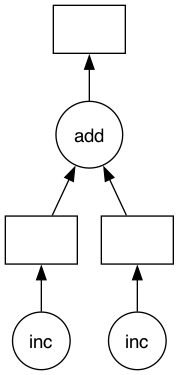

In [15]:
result_delayed.visualize()

In [16]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


# **Exercices**

## **Exercice 1 : Extraction de fichiers Zip**

### **Objectif :** 
Écrire une fonction qui extrait tous les fichiers ZIP d'un répertoire source vers un répertoire de destination.

#### **Consignes :**

- La fonction doit être nommée extraire_fichiers_zip.
- La fonction doit accepter deux arguments :
    - repertoire_source : Le répertoire dans lequel rechercher les fichiers ZIP.
    - repertoire_destination : Le répertoire où les fichiers ZIP doivent être extraits.
- Si le répertoire de destination n'existe pas, la fonction doit le créer.
- Après l'extraction de chaque fichier ZIP, affichez un message informant l'utilisateur que le fichier a été extrait avec succès.

#### **Bonus :**

- Gérez les exceptions potentielles qui pourraient survenir lors de l'ouverture de fichiers ZIP corrompus.
- Créez une fonction de logs pour enregistrer chaque action réalisée (par exemple, la création d'un répertoire, l'extraction réussie d'un fichier, etc.).

#### **Astuces :**

- Utilisez le module os pour interagir avec le système de fichiers.
- Le module zipfile vous sera très utile pour gérer les fichiers ZIP.


Bonne chance !

In [17]:
import pandas as pd
import numpy as np
import zipfile, os
import dask.dataframe as dd

In [18]:
os.listdir()

['TD4.ipynb', '.DS_Store', 'mydask.png', 'data', 'vol01.csv']

In [19]:
def extraire_fichiers_zip(repertoire_source, repertoire_destination):
    """
    Extrait tous les fichiers zip du répertoire source vers le répertoire de destination.

    Paramètres:
    - repertoire_source (str): Le répertoire dans lequel rechercher les fichiers zip.
    - repertoire_destination (str): Le répertoire où les fichiers zip doivent être extraits.

    Retourne:
    - None
    """

    # Assurez-vous que le répertoire de destination existe; sinon, créez-le
    if not os.path.exists(repertoire_destination):
        os.makedirs(repertoire_destination)

    # Boucle à travers tous les fichiers dans le répertoire source
    for nom_fichier in os.listdir(repertoire_source):
        chemin_fichier = os.path.join(repertoire_source, nom_fichier)

        # Vérifiez si le fichier actuel est un fichier zip
        if zipfile.is_zipfile(chemin_fichier):
            # Ouvrez le fichier zip et faites extraire son contenu dans le répertoire de destination
            with zipfile.ZipFile(chemin_fichier) as fichier_zip:
                fichier_zip.extractall(repertoire_destination)  # Extrait tous les fichiers dans le répertoire de destination
                print(f"{nom_fichier} a été extrait vers {repertoire_destination}.")

# Définir le répertoire où les fichiers zip sont stockés
repertoire_source = '../data'

# Définir le répertoire où les fichiers doivent être extraits
repertoire_destination = 'data/data_extracted'

# Print la liste des fichiers dans le répertoire source
print("Fichiers dans repertoire_source:", os.listdir(repertoire_source))

# Appelez la fonction pour extraire tous les fichiers zip du source vers le répertoire de destination
extraire_fichiers_zip(repertoire_source, repertoire_destination)

# Print la liste des fichiers dans le répertoire de destination après extraction
print("Fichiers dans repertoire_destination après extraction:", os.listdir(repertoire_destination))

Fichiers dans repertoire_source: ['Aircraft_03.h5.zip', '.DS_Store', 'Aircraft_01.h5.zip', 'Vol008.csv', 'Vol009.csv', 'Rouet_vibrations.csv', 'Aircraft_02.h5.zip', 'accars_b.xlsx', 'Rouet_geometries.csv', 'Vol007.csv', 'Vol006.csv', 'Vol004.csv', 'Vol010.csv', 'Vol005.csv', 'archive.zip', 'Vol001.csv', 'Vol002.csv', 'Vol003.csv']
Aircraft_03.h5.zip a été extrait vers data/data_extracted.
Aircraft_01.h5.zip a été extrait vers data/data_extracted.
Aircraft_02.h5.zip a été extrait vers data/data_extracted.
accars_b.xlsx a été extrait vers data/data_extracted.
archive.zip a été extrait vers data/data_extracted.
Fichiers dans repertoire_destination après extraction: ['[Content_Types].xml', 'docProps', 'Aircraft_01.h5', '__MACOSX', '_rels', 'Aircraft_01_sans_les_vides.h5', 'Aircraft_02.h5', 'Aircraft_03.h5', 'xl']


## **Exercice 2 : Lecture d'un fichier HDF5 avec Dask**

Lisez le fichier HDF5 du premier avion "Aircraft 01" à l'aide de la fonction `read_hdf` de Dask.

In [20]:
nom_du_fichier = 'Aircraft_01.h5'
chemin_fichier = os.path.join(repertoire_destination, nom_du_fichier)
ddf = dd.read_hdf(chemin_fichier,'*')

TypeError: An error occurred while calling the read_hdf method registered to the pandas backend.
Original Message: 
This HDFStore is not partitionable and can only be use monolithically with
pandas.  In the future when creating HDFStores use the ``format='table'``
option to ensure that your dataset can be parallelized

### **L'Erreur**

Lors de la tentative de lecture d'un fichier HDF5 stocké au format fixe à l'aide de la fonction `read_hdf` de Dask, vous pourriez rencontrer l'erreur ci-dessus.
Cette erreur indique que le fichier HDF5 est dans un format qui ne lui permet pas d'être facilement partitionné pour un traitement parallèle par Dask.


### **Pourquoi?**

HDF5 est un format de stockage de données populaire capable de stocker de grands ensembles de données. Au sein du format HDF5, il existe deux principales façons de stocker des données :

1. **Format Fixe** : C'est le format de stockage par défaut dans lequel les données sont stockées sous forme de bloc monolithique.
2. **Format Tableau** : Dans ce format, les données sont stockées par morceaux, ce qui les rend essentiellement "partitionnées" et adaptées au traitement hors-mémoire et parallèle.

Dask est une bibliothèque de calcul parallèle qui permet des opérations efficaces sur de grands ensembles de données en travaillant simultanément sur de petits morceaux ou partitions. Lors de la tentative de lecture d'un fichier HDF5 avec Dask, si les données sont stockées au format fixe, cela peut conduire à des inefficacités et des erreurs potentielles car le fichier n'est pas intrinsèquement partitionné.



### **Objectif**

- Votre tâche est d'écrire une fonction capable de gérer cette erreur. La fonction devrait :

    1. Essayer de lire le fichier HDF5 à l'aide de Dask.
    2. S'il rencontre l'erreur mentionnée ci-dessus, il devrait créer une version partitionnée du fichier au format `tableau` et la stocker dans un dossier "data_dask".
    3. Une fois la version partitionnée créée, elle devrait lire cette version à l'aide de Dask et renvoyer le DataFrame Dask résultant.

### **Bonus**

- Améliorez la fonction pour vérifier d'abord si une version partitionnée du fichier existe déjà, et si c'est le cas, lisez cette version directement sans essayer de lire le fichier non partitionné.

### **Astuce**

- N'oubliez pas d'utiliser l'argument format='table' lors de la création d'une version partitionnée du fichier HDF5 avec pandas.

Bonne chance !


In [21]:
def lire_hdf_dask(nom_fichier, repertoire='data/data_extracted'):
    """
    Charge un fichier HDF5 dans un DataFrame Dask.

    Si le fichier HDF5 n'est pas partitionnable et qu'il n'y a pas déjà une version partitionnée,
    une version partitionnée sera créée dans le répertoire 'data/data_dask'.

    Paramètres:
    - nom_fichier (str): Nom du fichier HDF5.
    - repertoire (str, facultatif): Répertoire contenant le fichier HDF5. Par défaut, 'data/data_extracted'.

    Retour:
    - ddf: DataFrame Dask
    """
    repertoire_dask = 'data/data_dask'

    # Vérifiez si le répertoire dask existe; sinon, créez-le
    if not os.path.exists(repertoire_dask):
        os.makedirs(repertoire_dask)

    fichier_partitionne = os.path.join(repertoire_dask, f"{nom_fichier[:-3]}_dask.h5")

    # Vérifiez si une version partitionnée du fichier existe
    if os.path.exists(fichier_partitionne):
        return dd.read_hdf(fichier_partitionne, '*')

    chemin_fichier = os.path.join(repertoire, nom_fichier)

    try:
        return dd.read_hdf(chemin_fichier, '*')
    except TypeError:
        with pd.HDFStore(chemin_fichier) as store:
            keys_store = store.keys()
            if not keys_store:
                raise ValueError(f"Aucun jeu de données trouvé dans HDFStore: {nom_fichier}")

            print("Ce HDFStore n'est pas partitionnable et ne peut être utilisé de manière monolithique qu'avec pandas.")
            print(f"Création d'un nouveau fichier de données: '{nom_fichier[:-3]}_dask.h5'")

            # Créez une version partitionnée du fichier
            with pd.HDFStore(fichier_partitionne, mode='w') as h:
                for key in keys_store:
                    h.put(key, store[key], format='table')
            print(f"Lecture du fichier de données: '{nom_fichier[:-3]}_dask.h5'")
            return dd.read_hdf(fichier_partitionne, '*')

# Testez la fonction
nom_du_fichier = 'Aircraft_01.h5'
ddf = lire_hdf_dask(nom_du_fichier)
print(f"DataFrame Dask du fichier {nom_du_fichier} a été chargé dans 'ddf'.")

DataFrame Dask du fichier Aircraft_01.h5 a été chargé dans 'ddf'.


In [22]:
print(ddf.head())

           ALT [ft]  EGT_1 [deg C]  EGT_2 [deg C]  FMV_1 [mm]  FMV_2 [mm]  \
record_00                                                                   
0         -4.636641      33.494949      33.494949    -0.64553    -0.64913   
1         -4.636641      33.494949      33.494949    -0.64553    -0.64913   
2         -4.636641      33.494949      33.494949    -0.64553    -0.64913   
3         -4.636641      33.494949      33.494949    -0.64553    -0.64913   
4         -4.636641      33.494949      33.494949    -0.64553    -0.64913   

           HPTACC_1 [%]  HPTACC_2 [%]  M [Mach]  N1_1 [% rpm]  N1_2 [% rpm]  \
record_00                                                                     
0              4.637541     34.737062       0.0           0.0           0.0   
1              4.637541     34.737062       0.0           0.0           0.0   
2              4.696870     34.737062       0.0           0.0           0.0   
3              4.696870     34.737062       0.0           0.0    

## **Exercice 3 : Exploration de Dask DataFrame**

Dans cet exercice, vous allez explorer les caractéristiques et les propriétés de base d'un Dask DataFrame (ddf). L'objectif est de vous familiariser avec les composants clés et les méthodes associées à un Dask DataFrame.

### **Objectifs :**

1. **Nombre de Partitions** : 
   - Déterminez combien de partitions sont présentes dans le Dask DataFrame `ddf`.

2. **Noms des Indices** : 
   - Utilisez la méthode `map_partitions` pour obtenir le nom des indices de chaque partition de `ddf`.
   - Affichez les 10 premiers noms d'index.
   - Comptez le nombre total de noms d'index que vous avez récupérés.

3. **Colonnes du DataFrame** :
   - Récupérez toutes les colonnes de `ddf` et stockez-les dans une variable.
   - Comptez le nombre de colonnes.

4. **Types de Données** :
   - Examinez les types de données de chaque colonne dans `ddf`.

5. **Aperçu d'une Partition** :
   - Affichez les premières lignes de la première partition de `ddf`.

### **Astuces :**

- La méthode `map_partitions` peut être utilisée pour appliquer une fonction à chaque partition d'un Dask DataFrame.
- La méthode `compute()` force l'évaluation d'une opération Dask. Souvenez-vous que Dask est paresseux par défaut, c'est-à-dire qu'il ne calcule pas les résultats tant que vous ne le lui demandez pas.
- Vous pouvez accéder à une partition spécifique en utilisant `ddf.partitions[index]`.

### **Bonus :**

- Essayez d'afficher les dernières lignes de la dernière partition de `ddf`.
- Explorez d'autres méthodes et propriétés associées à `ddf` pour obtenir une meilleure compréhension de vos données.

Bonne chance !

**1. Nombre de Partitions :**

In [23]:
ddf.npartitions

1001

**2. Noms des Indices :**

In [24]:
def noms_indices(df):
    return pd.Series(df.index.names)

ddf.map_partitions(noms_indices, meta=pd.Series(dtype=object)).compute()

0     record_00
0     record_01
0     record_02
0     record_03
0     record_04
        ...    
0    record_995
0    record_996
0    record_997
0    record_998
0    record_999
Length: 1001, dtype: object

**3. Colonnes du DataFrame :**

In [25]:
colonne=ddf.columns
print(colonne)

Index(['ALT [ft]', 'EGT_1 [deg C]', 'EGT_2 [deg C]', 'FMV_1 [mm]',
       'FMV_2 [mm]', 'HPTACC_1 [%]', 'HPTACC_2 [%]', 'M [Mach]',
       'N1_1 [% rpm]', 'N1_2 [% rpm]', 'N2_1 [% rpm]', 'N2_2 [% rpm]',
       'NAIV_1 [bool]', 'NAIV_2 [bool]', 'P0_1 [psia]', 'P0_2 [psia]',
       'PRV_1 [bool]', 'PRV_2 [bool]', 'PS3_1 [psia]', 'PS3_2 [psia]',
       'PT2_1 [mbar]', 'PT2_2 [mbar]', 'P_OIL_1 [psi]', 'P_OIL_2 [psi]',
       'Q_1 [lb/h]', 'Q_2 [lb/h]', 'T1_1 [deg C]', 'T1_2 [deg C]',
       'T2_1 [deg C]', 'T2_2 [deg C]', 'T3_1 [deg C]', 'T3_2 [deg C]',
       'T5_1 [deg C]', 'T5_2 [deg C]', 'TAT [deg C]', 'TBV_1 [%]', 'TBV_2 [%]',
       'TCASE_1 [deg C]', 'TCASE_2 [deg C]', 'TLA_1 [deg]', 'TLA_2 [deg]',
       'T_OIL_1 [deg C]', 'T_OIL_2 [deg C]', 'VBV_1 [mm]', 'VBV_2 [mm]',
       'VIB_AN1_1 [mils]', 'VIB_AN1_2 [mils]', 'VIB_AN2_1 [ips]',
       'VIB_AN2_2 [ips]', 'VIB_BN1_1 [mils]', 'VIB_BN1_2 [mils]',
       'VIB_BN2_1 [ips]', 'VIB_BN2_2 [ips]', 'VSV_1 [mm]', 'VSV_2 [mm]'],
      dtyp

In [26]:
len(colonne)

55

**4. Types de Données :**

In [27]:
types_donnees = ddf.dtypes
print("Types de données de chaque colonne :")
print(types_donnees)

Types de données de chaque colonne :
ALT [ft]            float64
EGT_1 [deg C]       float64
EGT_2 [deg C]       float64
FMV_1 [mm]          float64
FMV_2 [mm]          float64
HPTACC_1 [%]        float64
HPTACC_2 [%]        float64
M [Mach]            float64
N1_1 [% rpm]        float64
N1_2 [% rpm]        float64
N2_1 [% rpm]        float64
N2_2 [% rpm]        float64
NAIV_1 [bool]       float64
NAIV_2 [bool]       float64
P0_1 [psia]         float64
P0_2 [psia]         float64
PRV_1 [bool]        float64
PRV_2 [bool]        float64
PS3_1 [psia]        float64
PS3_2 [psia]        float64
PT2_1 [mbar]        float64
PT2_2 [mbar]        float64
P_OIL_1 [psi]       float64
P_OIL_2 [psi]       float64
Q_1 [lb/h]          float64
Q_2 [lb/h]          float64
T1_1 [deg C]        float64
T1_2 [deg C]        float64
T2_1 [deg C]        float64
T2_2 [deg C]        float64
T3_1 [deg C]        float64
T3_2 [deg C]        float64
T5_1 [deg C]        float64
T5_2 [deg C]        float64
TAT [deg C]

**5. Aperçu d'une Partition :**

In [28]:
premiere_partition = ddf.partitions[0]
print("Premières lignes de la première partition :")
print(premiere_partition.head())

Premières lignes de la première partition :
           ALT [ft]  EGT_1 [deg C]  EGT_2 [deg C]  FMV_1 [mm]  FMV_2 [mm]  \
record_00                                                                   
0         -4.636641      33.494949      33.494949    -0.64553    -0.64913   
1         -4.636641      33.494949      33.494949    -0.64553    -0.64913   
2         -4.636641      33.494949      33.494949    -0.64553    -0.64913   
3         -4.636641      33.494949      33.494949    -0.64553    -0.64913   
4         -4.636641      33.494949      33.494949    -0.64553    -0.64913   

           HPTACC_1 [%]  HPTACC_2 [%]  M [Mach]  N1_1 [% rpm]  N1_2 [% rpm]  \
record_00                                                                     
0              4.637541     34.737062       0.0           0.0           0.0   
1              4.637541     34.737062       0.0           0.0           0.0   
2              4.696870     34.737062       0.0           0.0           0.0   
3              4.6968

**Bonus :**

In [29]:
derniere_partition = ddf.partitions[-1]
print("Dernières lignes de la dernière partition :")
print(derniere_partition.tail())


Dernières lignes de la dernière partition :
              ALT [ft]  EGT_1 [deg C]  EGT_2 [deg C]  FMV_1 [mm]  FMV_2 [mm]  \
record_999                                                                     
5490        746.499128     207.865716     234.464646   -0.795385    -0.79982   
5491        746.499128     207.865716     233.479501   -0.795385    -0.79982   
5492        746.499128     207.865716     232.494355   -0.795385    -0.79982   
5493        746.499128     207.865716     232.494355   -0.795385    -0.79982   
5494        746.499128     206.880570     232.494355   -0.795385    -0.79982   

            HPTACC_1 [%]  HPTACC_2 [%]  M [Mach]  N1_1 [% rpm]  N1_2 [% rpm]  \
record_999                                                                     
5490            3.836601      3.767384       0.0           0.0           0.0   
5491            3.836601      3.708055       0.0           0.0           0.0   
5492            3.836601      3.708055       0.0           0.0           0.

In [30]:
stats_descriptives = ddf.describe()
print("Statistiques descriptives du DataFrame :")
print(stats_descriptives)

Statistiques descriptives du DataFrame :
Dask DataFrame Structure:
              ALT [ft] EGT_1 [deg C] EGT_2 [deg C] FMV_1 [mm] FMV_2 [mm] HPTACC_1 [%] HPTACC_2 [%] M [Mach] N1_1 [% rpm] N1_2 [% rpm] N2_1 [% rpm] N2_2 [% rpm] NAIV_1 [bool] NAIV_2 [bool] P0_1 [psia] P0_2 [psia] PRV_1 [bool] PRV_2 [bool] PS3_1 [psia] PS3_2 [psia] PT2_1 [mbar] PT2_2 [mbar] P_OIL_1 [psi] P_OIL_2 [psi] Q_1 [lb/h] Q_2 [lb/h] T1_1 [deg C] T1_2 [deg C] T2_1 [deg C] T2_2 [deg C] T3_1 [deg C] T3_2 [deg C] T5_1 [deg C] T5_2 [deg C] TAT [deg C] TBV_1 [%] TBV_2 [%] TCASE_1 [deg C] TCASE_2 [deg C] TLA_1 [deg] TLA_2 [deg] T_OIL_1 [deg C] T_OIL_2 [deg C] VBV_1 [mm] VBV_2 [mm] VIB_AN1_1 [mils] VIB_AN1_2 [mils] VIB_AN2_1 [ips] VIB_AN2_2 [ips] VIB_BN1_1 [mils] VIB_BN1_2 [mils] VIB_BN2_1 [ips] VIB_BN2_2 [ips] VSV_1 [mm] VSV_2 [mm]
npartitions=1                                                                                                                                                                                    

## **Exercice 4 : Manipulation avancée avec Dask et comparaison avec Pandas**

Après avoir exploré les bases de `Dask DataFrame`, poursuivons avec des opérations plus avancées. L'objectif est de comprendre et de comparer le comportement de Dask par rapport à Pandas, notamment en termes de performances.

### **Objectifs :**

1. **Maximum de la colonne Vitesse** :
   - Utilisez `map_partitions` pour trouver la vitesse maximale (`SPEED`) de chaque partition dans `ddf`.
   - Calculez le temps d'exécution avec `%time`.

2. **Extraction de la ligne avec la vitesse maximale** :
   - Sélectionnez une partition spécifique de `ddf` (par exemple, la 676ème partition) et trouvez la ligne ayant la vitesse maximale.
   - Utilisez une fonction personnalisée pour obtenir la ligne avec la vitesse maximale pour chaque partition.

3. **Comparaison avec Pandas** :
   - Lisez le fichier HDF5 du premier avion avec Pandas et obtenez la liste des clés.
   - Comptez le nombre d'enregistrements et vérifiez les DataFrames vides.
   - Supprimez les enregistrements vides.
   - Mesurez le temps d'exécution pour trouver la ligne avec la vitesse maximale pour chaque DataFrame dans votre fichier avec Pandas.

### **Astuces :**

- La méthode `idxmax()` donne l'index de la première occurrence de la valeur maximale.
- Vous pouvez mesurer le temps d'exécution d'une cellule dans un notebook Jupyter avec la commande magique `%time`.

### **Bonus :**

- Essayez d'optimiser vos fonctions pour réduire le temps d'exécution.
- Comparez les résultats obtenus avec Dask et Pandas pour vérifier leur cohérence.
- Réfléchissez à des scénarios où l'utilisation de Dask serait préférable à celle de Pandas et vice-versa.

Bonne chance !

1. **Maximum de la colonne Vitesse :** 

In [50]:
# Fonction pour calculer la vitesse maximale dans une partition
def calculate_max_speed_partition(df):
    gamma = 1.4  # Rapport des capacités thermiques
    R = 287.05   # Constante spécifique des gaz pour l'air 
    df = df.dropna(subset=['M [Mach]', 'TAT [deg C]'])
    # Convertir la température en Kelvin
    T = df['TAT [deg C]'] + 273.15
    # Calculer la vitesse du son
    a = np.sqrt(gamma * R * T)
    # Calcul de la vitesse réelle en m/s
    df['Vitesse [m/s]'] = df['M [Mach]'] * a
    
    
    return df['Vitesse [m/s]'].max()


%time max_speeds = ddf.map_partitions(calculate_max_speed_partition, meta=('Vitesse [m/s]', 'float64')).compute()

# Afficher les vitesses maximales de chaque partition
print("Vitesse maximale de chaque partition (en m/s) :")
print(max_speeds)

# vitesse maximale globale
vitesse_maximale_globale = max_speeds.max()
print(f"Vitesse maximale globale (en m/s) : {vitesse_maximale_globale}")

# km/h
vitesse_maximale_globale_kmh = vitesse_maximale_globale * 3.6
print(f"Vitesse maximale globale (en km/h) : {vitesse_maximale_globale_kmh}")


CPU times: user 1.3 s, sys: 375 ms, total: 1.67 s
Wall time: 5.36 s


0       39439.264501
1       39457.811063
2       40825.620025
3       42012.600005
4       33629.553895
            ...     
996     35957.147450
997     39462.447704
998     39564.453796
999     35975.694012
1000    39545.907234
Length: 1001, dtype: float64

2. **Extraction de la ligne avec la vitesse maximale :**

In [32]:
import numpy as np
import dask.dataframe as dd

# Fonction pour calculer la vitesse et retourner la ligne avec la vitesse maximale
def row_max_speed(df):
    gamma = 1.4  # Rapport des capacités thermiques
    R = 287.05   # Constante spécifique des gaz pour l'air 
    df = df.dropna(subset=['M [Mach]', 'TAT [deg C]'])
    # Convertir la température en Kelvin
    T = df['TAT [deg C]'] + 273.15
    # Calculer la vitesse du son
    a = np.sqrt(gamma * R * T)
    # Calcul de la vitesse réelle en m/s
    df['Vitesse [m/s]'] = df['M [Mach]'] * a
    
    if not df.empty:
        # Trouver l'index de la vitesse maximale
        idx_max_speed = df['Vitesse [m/s]'].idxmax()
        # Extraire la ligne correspondante
        result = df.loc[[idx_max_speed]]
        # Supprimer la colonne 'Vitesse [m/s]'
        result = result.drop(columns=['Vitesse [m/s]'])
        return result
    else:
        return df.head(0)

In [33]:
max_speed_rows = ddf.map_partitions(row_max_speed, meta=ddf._meta).compute()
print("Ligne avec la vitesse maximale pour chaque partition :")
print(max_speed_rows)

Ligne avec la vitesse maximale pour chaque partition :
          ALT [ft]  EGT_1 [deg C]  EGT_2 [deg C]  FMV_1 [mm]  FMV_2 [mm]  \
4912  38238.374599     669.898989     670.884135    8.576330    8.473461   
2338  39392.898096     695.512774     693.542483    9.371716    9.423972   
1974  35498.120035     782.205584     784.175875   11.100814   11.162712   
1654  40264.586519     758.562090     754.621508   10.524448   10.501991   
1592  33402.358508     707.334521     703.393938   10.593612   10.722231   
...            ...            ...            ...         ...         ...   
2112  35924.690966     639.359476     643.300059    9.152696    9.203731   
3174  39388.261455     594.042780     604.879381    7.492762    7.464991   
2026  36893.748840     741.814616     744.770052   10.812631   10.791781   
5538  35929.327606     647.240641     659.062388    9.579208    9.632621   
1893  36601.640486     741.814616     752.651217   10.881795   10.872922   

      HPTACC_1 [%]  HPTACC_2 [%]

3. **Comparaison avec Pandas :**

In [34]:
nombre_total_enregistrements = 0
nombre_dataframes_vides = 0
nombre_dataframes_total = 0

informations_dataframes = []

# Ouvrir le fichier HDF5
with pd.HDFStore('data/data_extracted/Aircraft_01.h5', mode='r') as store:
    # Obtenir la liste des clés
    liste_cles = store.keys()

    # Parcourir chaque clé
    for cle in liste_cles:
            # Lire le DataFrame associé à la clé
            df = pd.read_hdf('data/data_extracted/Aircraft_01.h5', key=cle)

            # Compter le nombre de lignes
            nombre_lignes = len(df)

            # Vérifier si le DataFrame est vide
            if df.empty or nombre_lignes == 0:
                nombre_dataframes_vides += 1
                est_vide = True
                
            else:
                est_vide = False
                nombre_total_enregistrements += nombre_lignes

            # Incrémenter le compteur total de DataFrames
            nombre_dataframes_total += 1

            # Stocker les informations
            informations_dataframes.append({
                'clé': cle,
                'nombre_lignes': nombre_lignes,
                'est_vide': est_vide
            })


In [35]:
print("\nInformations détaillées sur chaque DataFrame :")
for info in informations_dataframes:
    print(f"Clé : {info['clé']}, Nombre de lignes : {info['nombre_lignes']}, Est vide : {info['est_vide']}")


Informations détaillées sur chaque DataFrame :
Clé : /record_00, Nombre de lignes : 7429, Est vide : False
Clé : /record_01, Nombre de lignes : 7459, Est vide : False
Clé : /record_02, Nombre de lignes : 7042, Est vide : False
Clé : /record_03, Nombre de lignes : 6457, Est vide : False
Clé : /record_04, Nombre de lignes : 4860, Est vide : False
Clé : /record_05, Nombre de lignes : 3510, Est vide : False
Clé : /record_06, Nombre de lignes : 3389, Est vide : False
Clé : /record_07, Nombre de lignes : 2537, Est vide : False
Clé : /record_08, Nombre de lignes : 1429, Est vide : False
Clé : /record_09, Nombre de lignes : 1027, Est vide : False
Clé : /record_10, Nombre de lignes : 7049, Est vide : False
Clé : /record_100, Nombre de lignes : 7248, Est vide : False
Clé : /record_1000, Nombre de lignes : 5012, Est vide : False
Clé : /record_1001, Nombre de lignes : 5251, Est vide : False
Clé : /record_101, Nombre de lignes : 7278, Est vide : False
Clé : /record_102, Nombre de lignes : 12003, E

In [36]:
print(f"Nombre total d'enregistrements (lignes) : {nombre_total_enregistrements}")
print(f"Nombre de DataFrames vides : {nombre_dataframes_vides}")

Nombre total d'enregistrements (lignes) : 7574733
Nombre de DataFrames vides : 1


In [37]:
with pd.HDFStore('data/data_extracted/Aircraft_01.h5', mode='r') as store_lecture:
    with pd.HDFStore('data/data_extracted/Aircraft_01_sans_les_vides.h5', mode='w') as store_ecriture:
        for cle in store_lecture.keys():
            df = store_lecture[cle]
            df = df.dropna(how='all')
            if not df.empty:
                store_ecriture.put(cle, df)

In [38]:
with pd.HDFStore('data/data_extracted/Aircraft_01_sans_les_vides.h5', mode='r') as store:
    for cle in store.keys():
        df = store[cle]
        print(f"Clé : {cle}, Nombre de lignes : {len(df)}")

Clé : /record_00, Nombre de lignes : 7429
Clé : /record_01, Nombre de lignes : 7459
Clé : /record_02, Nombre de lignes : 7042
Clé : /record_03, Nombre de lignes : 6457
Clé : /record_04, Nombre de lignes : 4860
Clé : /record_05, Nombre de lignes : 3510
Clé : /record_06, Nombre de lignes : 3389
Clé : /record_07, Nombre de lignes : 2537
Clé : /record_08, Nombre de lignes : 1429
Clé : /record_09, Nombre de lignes : 1027
Clé : /record_10, Nombre de lignes : 7049
Clé : /record_100, Nombre de lignes : 7248
Clé : /record_1000, Nombre de lignes : 5012
Clé : /record_1001, Nombre de lignes : 5251
Clé : /record_101, Nombre de lignes : 7278
Clé : /record_102, Nombre de lignes : 12003
Clé : /record_103, Nombre de lignes : 11801
Clé : /record_104, Nombre de lignes : 6494
Clé : /record_105, Nombre de lignes : 6525
Clé : /record_106, Nombre de lignes : 5395
Clé : /record_107, Nombre de lignes : 4369
Clé : /record_108, Nombre de lignes : 4527
Clé : /record_109, Nombre de lignes : 4551
Clé : /record_11, 

Je veux vérifier les clé ou il y'a eu des modifications

In [39]:
cles_avec_suppressions = []
with pd.HDFStore('data/data_extracted/Aircraft_01.h5', mode='r') as store_lecture:
    with pd.HDFStore('data/data_extracted/Aircraft_01_sans_les_vides.h5', mode='w') as store_ecriture:
        for cle in store_lecture.keys():
            df = store_lecture[cle]
            nb_lignes_avant = len(df)
            df = df.dropna(how='all')
            nb_lignes_apres = len(df)
            if nb_lignes_apres < nb_lignes_avant:
                cles_avec_suppressions.append(cle)
            if not df.empty:
                store_ecriture.put(cle, df)

print("DataFrames où des suppressions ont eu lieu :")
for cle in cles_avec_suppressions:
    print(cle)

DataFrames où des suppressions ont eu lieu :
/record_702


In [40]:
chemin_fichier = 'data/data_extracted/Aircraft_01.h5'

with pd.HDFStore(chemin_fichier, mode='r') as store:
    liste_cles = store.keys()
    
    for cle in liste_cles:
        df = store.get(cle)

        print(f"\nNoms des colonnes pour '{cle}' :")
        print(df.columns.tolist())


Noms des colonnes pour '/record_00' :
['ALT [ft]', 'EGT_1 [deg C]', 'EGT_2 [deg C]', 'FMV_1 [mm]', 'FMV_2 [mm]', 'HPTACC_1 [%]', 'HPTACC_2 [%]', 'M [Mach]', 'N1_1 [% rpm]', 'N1_2 [% rpm]', 'N2_1 [% rpm]', 'N2_2 [% rpm]', 'NAIV_1 [bool]', 'NAIV_2 [bool]', 'P0_1 [psia]', 'P0_2 [psia]', 'PRV_1 [bool]', 'PRV_2 [bool]', 'PS3_1 [psia]', 'PS3_2 [psia]', 'PT2_1 [mbar]', 'PT2_2 [mbar]', 'P_OIL_1 [psi]', 'P_OIL_2 [psi]', 'Q_1 [lb/h]', 'Q_2 [lb/h]', 'T1_1 [deg C]', 'T1_2 [deg C]', 'T2_1 [deg C]', 'T2_2 [deg C]', 'T3_1 [deg C]', 'T3_2 [deg C]', 'T5_1 [deg C]', 'T5_2 [deg C]', 'TAT [deg C]', 'TBV_1 [%]', 'TBV_2 [%]', 'TCASE_1 [deg C]', 'TCASE_2 [deg C]', 'TLA_1 [deg]', 'TLA_2 [deg]', 'T_OIL_1 [deg C]', 'T_OIL_2 [deg C]', 'VBV_1 [mm]', 'VBV_2 [mm]', 'VIB_AN1_1 [mils]', 'VIB_AN1_2 [mils]', 'VIB_AN2_1 [ips]', 'VIB_AN2_2 [ips]', 'VIB_BN1_1 [mils]', 'VIB_BN1_2 [mils]', 'VIB_BN2_1 [ips]', 'VIB_BN2_2 [ips]', 'VSV_1 [mm]', 'VSV_2 [mm]']

Noms des colonnes pour '/record_01' :
['ALT [ft]', 'EGT_1 [deg C]', 

In [41]:
import pandas as pd
import numpy as np
import time

GAMMA = 1.4    
R = 287.05     

def find_max_speed_row(df):
  
    required_columns = ['M [Mach]', 'TAT [deg C]']
    df = df.dropna(subset=required_columns)
    df = df.dropna(subset=required_columns)

   
    T = df['TAT [deg C]'] + 273.15
    a = np.sqrt(GAMMA * R * T)

    df['Vitesse [m/s]'] = df['M [Mach]'] * a

    idx_max_speed = df['Vitesse [m/s]'].idxmax()

    max_speed_ligne = df.loc[idx_max_speed]

    return max_speed_ligne

max_speed_lignes = []
start_time = time.time()

with pd.HDFStore('data/data_extracted/Aircraft_01_sans_les_vides.h5', mode='r') as store:
    liste_cles = store.keys()
    
    for cle in liste_cles:
        df = store.get(cle)  
        max_speed_ligne = find_max_speed_row(df)
        if max_speed_ligne is not None:

            max_speed_ligne['Clé'] = cle
            max_speed_lignes.append(max_speed_ligne)
        else:
            print(f"Aucune donnée valide pour la clé {cle}")
    
end_time = time.time()
execution_time = end_time - start_time


In [42]:
print(f"Temps d'exécution total : {execution_time:.4f} secondes")
result_df = pd.DataFrame(max_speed_lignes)
colonnes = ['Clé'] + [col for col in result_df.columns if col != 'Clé']
result_df = result_df[colonnes]
vitesse_maximale_globale = result_df['Vitesse [m/s]'].max()
ligne_vitesse_maximale = result_df.loc[result_df['Vitesse [m/s]'] == vitesse_maximale_globale]
print("\nVitesse maximale globale : {:.2f} m/s soit {:.2f} km/h".format(vitesse_maximale_globale, vitesse_maximale_globale * 3.6))
print("Ligne correspondante :")
print(ligne_vitesse_maximale)

Temps d'exécution total : 5.0237 secondes

Vitesse maximale globale : 239.92 m/s soit 863.71 km/h
Ligne correspondante :
              Clé    ALT [ft]  EGT_1 [deg C]  EGT_2 [deg C]  FMV_1 [mm]  \
8567  /record_404  9644.21234            0.0            0.0   57.060261   

      FMV_2 [mm]  HPTACC_1 [%]  HPTACC_2 [%]  M [Mach]  N1_1 [% rpm]  ...  \
8567   56.798847           0.0           0.0  0.723064           0.0  ...   

      VIB_AN1_2 [mils]  VIB_AN2_1 [ips]  VIB_AN2_2 [ips]  VIB_BN1_1 [mils]  \
8567          6.124306              0.0         6.488848          2.333069   

      VIB_BN1_2 [mils]  VIB_BN2_1 [ips]  VIB_BN2_2 [ips]  VSV_1 [mm]  \
8567               0.0        18.628096         8.348012   16.672368   

      VSV_2 [mm]  Vitesse [m/s]  
8567    5.210115     239.918513  

[1 rows x 57 columns]


## **Exercice 5 : Analyse et Visualisation des Données avec Dask et Plotly**

Dans cette section, nous allons explorer davantage les fonctionnalités offertes par `Dask DataFrame` pour le traitement des données et nous plonger dans la visualisation à l'aide de `matplotlib` et `plotly`.

### **Objectifs :**

1. **Suppression des colonnes** :
   - L'avion est équipé de deux moteurs. Supprimez les colonnes du moteur 2 à l'aide d'une liste prédéfinie.
   - Vérifiez les colonnes restantes après suppression.

2. **Visualisation de séries temporelles** :
   - Définissez une fonction pour visualiser les séries temporelles de colonnes spécifiques d'une partition spécifique.
   - Testez cette fonction en visualisant certaines séries temporelles.

3. **Calcul de la longueur des vols** :
   - Calculez la longueur de chaque vol (nombre d'enregistrements) dans `ddf`.
   - Identifiez le vol ayant la durée maximale et minimale.

4. **Visualisation de la distribution de la longueur des vols** :
   - Utilisez `plotly` pour afficher la distribution de la longueur des vols à l'aide d'un graphique en boîte.

### **Astuces :**

- La méthode `drop` permet de supprimer des colonnes ou des lignes d'un DataFrame Dask.
- Utilisez `map_partitions` pour appliquer des fonctions à chaque partition de `ddf`.
- `plotly` est une bibliothèque de visualisation interactive qui peut être utilisée pour afficher une variété de types de graphiques.

### **Bonus :**

- Essayez d'autres types de visualisations avec `plotly` pour explorer davantage les données.
- Réfléchissez à des techniques pour optimiser le traitement et la visualisation des données à l'aide de Dask.
- Comparez les temps d'exécution entre différentes opérations pour mieux comprendre les avantages et inconvénients de Dask.

Bonne chance !


**1. Suppression des colonnes :**

In [43]:
list_var_e2 = [
                   'FMV_2 [mm]', 'HPTACC_2 [%]', 
                   'N1_2 [% rpm]','N2_2 [% rpm]',
                   'NAIV_2 [bool]', 'P0_2 [psia]',
                   'PRV_2 [bool]', 'PS3_2 [psia]',
                   'PT2_2 [mbar]', 'P_OIL_2 [psi]',
                   'Q_2 [lb/h]', 'T1_2 [deg C]',
                   'T2_2 [deg C]', 'T3_2 [deg C]',
                   'T5_2 [deg C]', 'TBV_2 [%]',
                   'TCASE_2 [deg C]', 'TLA_2 [deg]',
                   'T_OIL_2 [deg C]', 'VBV_2 [mm]',
                   'EGT_2 [deg C]','VIB_AN1_2 [mils]',
                   'VIB_AN2_2 [ips]', 'VIB_BN1_2 [mils]',
                   'VIB_BN2_2 [ips]', 'VSV_2 [mm]'
                ]

In [44]:
ddf_e1=ddf.drop(list_var_e2 , axis=1)  

In [45]:
print(ddf_e1)

Dask DataFrame Structure:
                 ALT [ft] EGT_1 [deg C] FMV_1 [mm] HPTACC_1 [%] M [Mach] N1_1 [% rpm] N2_1 [% rpm] NAIV_1 [bool] P0_1 [psia] PRV_1 [bool] PS3_1 [psia] PT2_1 [mbar] P_OIL_1 [psi] Q_1 [lb/h] T1_1 [deg C] T2_1 [deg C] T3_1 [deg C] T5_1 [deg C] TAT [deg C] TBV_1 [%] TCASE_1 [deg C] TLA_1 [deg] T_OIL_1 [deg C] VBV_1 [mm] VIB_AN1_1 [mils] VIB_AN2_1 [ips] VIB_BN1_1 [mils] VIB_BN2_1 [ips] VSV_1 [mm]
npartitions=1001                                                                                                                                                                                                                                                                                                                                                                                          
                  float64       float64    float64      float64  float64      float64      float64       float64     float64      float64      float64      float64       float64    flo

**2. Visualisation de séries temporelles :**

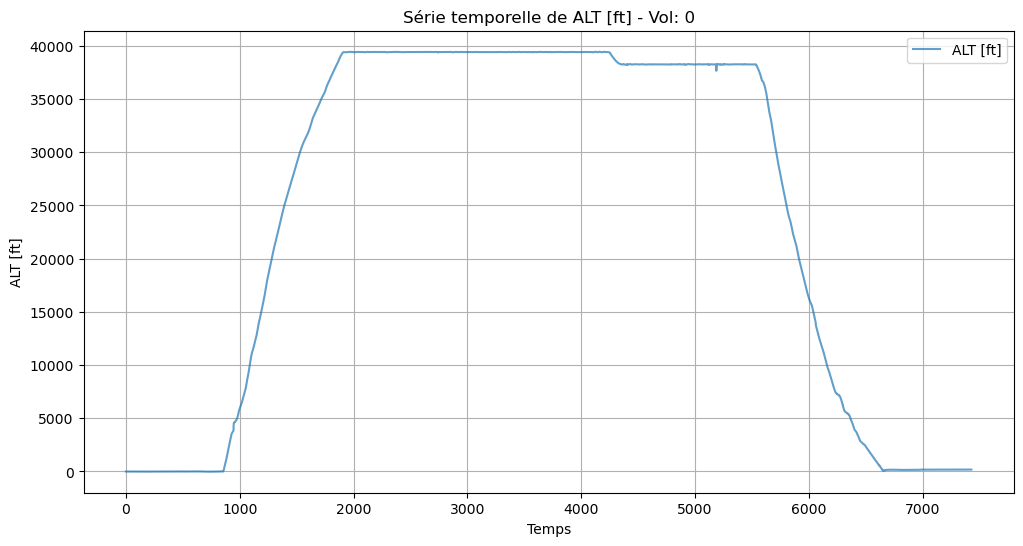

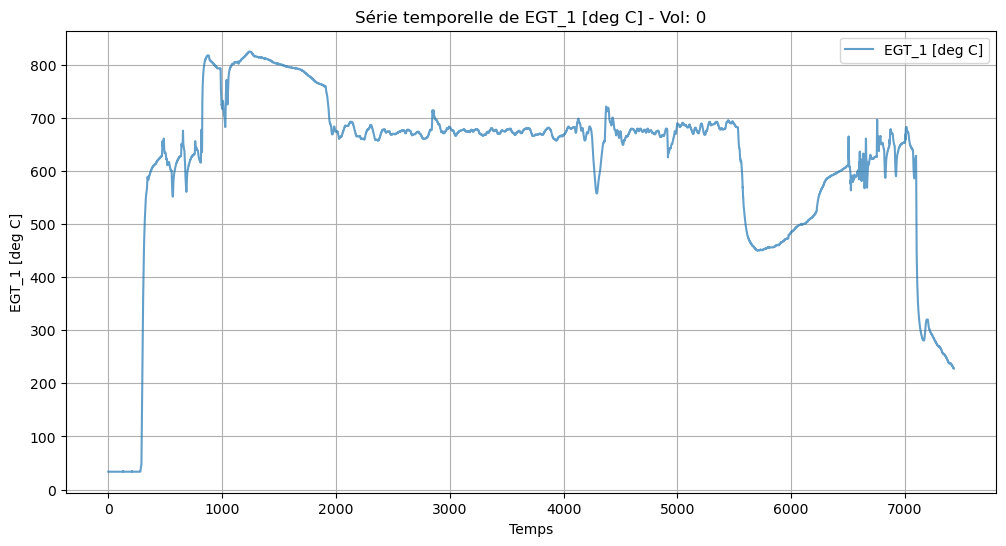

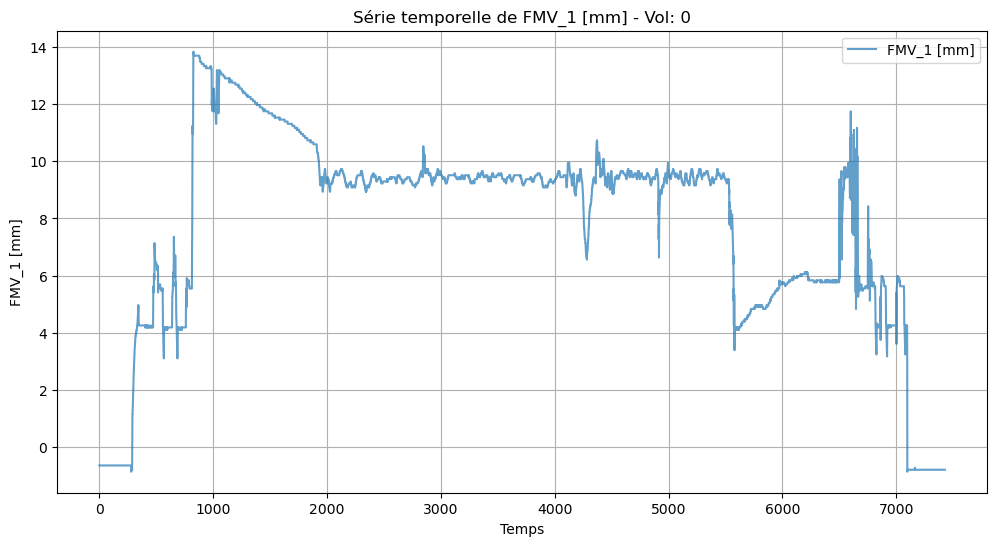

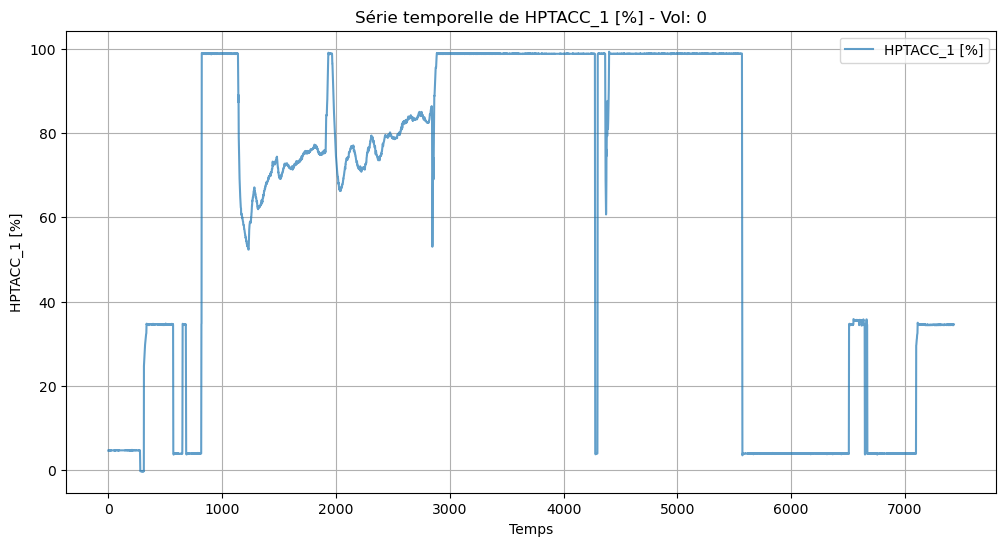

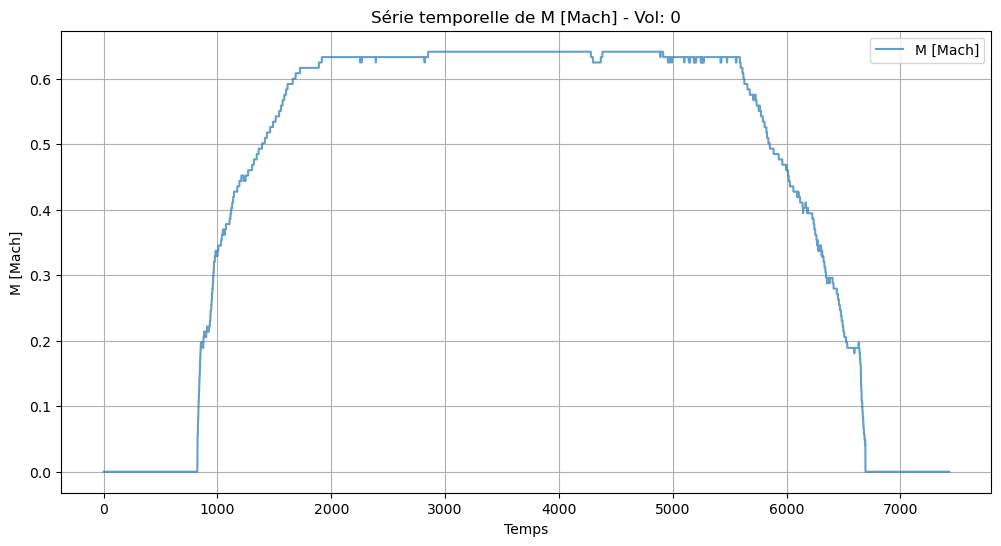

In [46]:
import matplotlib.pyplot as plt 

def tracer_serie_temporelle(ddf, numero_partition, colonnes):
    """
    Trace la série temporelle pour les colonnes spécifiées à partir d'une table donnée dans le fichier HDF5.
    
    Paramètres:
    - ddf : dask dataframe
    - numero_partition: Le numéro de la table à charger à partir du fichier HDF5.
    - colonnes: Une liste de colonnes à tracer.
    """

    donnees = ddf.partitions[numero_partition].compute()
    
    # Tracer la série temporelle pour les colonnes spécifiées
    for col in colonnes:
        plt.figure(figsize=(12, 6))
        plt.plot(donnees[col], label=col, alpha=0.7)
        plt.title(f'Série temporelle de {col} - Vol: {numero_partition}')
        plt.xlabel('Temps')
        plt.ylabel(col)
        plt.grid(True)
        plt.legend()
        plt.show()




# Testing the function 
tracer_serie_temporelle(ddf_e1, 0, ['ALT [ft]', 'EGT_1 [deg C]', 'FMV_1 [mm]', 'HPTACC_1 [%]', 'M [Mach]'])

**3. Calcul de la longueur des vols :**

In [47]:
longueurs_vols = ddf_e1.map_partitions(lambda ddf_e1:(ddf_e1.index.name,len(ddf_e1['ALT [ft]']))).compute()
longueurs_vols[:10]

0    (record_00, 7429)
1    (record_01, 7459)
2    (record_02, 7042)
3    (record_03, 6457)
4    (record_04, 4860)
5    (record_05, 3510)
6    (record_06, 3389)
7    (record_07, 2537)
8    (record_08, 1429)
9    (record_09, 1027)
dtype: object

In [48]:
longueurs_vols = dict(list(longueurs_vols))

vol_avec_longueur_max  = max(longueurs_vols, key=longueurs_vols.get)
vol_avec_longueur_min  = min(longueurs_vols, key=longueurs_vols.get)


print(f"{vol_avec_longueur_max} a la plus grande longueur de vol qui est =", longueurs_vols[vol_avec_longueur_max])
print(f"{vol_avec_longueur_min} a la plus petite longueur de vol qui est =", longueurs_vols[vol_avec_longueur_min])

record_542 a la plus grande longueur de vol qui est = 16136
record_09 a la plus petite longueur de vol qui est = 1027


4. **Visualisation de la distribution de la longueur des vols :**

In [49]:
import plotly.express as px
fig = px.box(longueurs_vols.values(), points="all")
fig.update_layout(
    autosize=False,
    width=800,
    height=800, xaxis_title="Vols", yaxis_title="Longeurs")
fig.show()